In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

1. Using lemonade.csv dataset and focusing on continuous variables:

In [4]:
lemonade = pd.read_csv('lemonade.csv')
lemonade.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [6]:
lemonade.shape

(365, 7)

In [7]:
lemonade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         365 non-null    object 
 1   Day          365 non-null    object 
 2   Temperature  365 non-null    float64
 3   Rainfall     365 non-null    float64
 4   Flyers       365 non-null    int64  
 5   Price        365 non-null    float64
 6   Sales        365 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 20.1+ KB


In [21]:
lemonade.describe()

,Temperature,Rainfall,Flyers,Price,Sales
count,365.000000,365.000000,365.000000,365.0,365.000000
mean,61.224658,0.825973,40.104110,0.5,27.589041
std,18.085892,0.273890,13.786445,0.0,29.979680
min,15.100000,0.400000,-38.000000,0.5,7.000000
25%,49.700000,0.650000,31.000000,0.5,20.000000
50%,61.100000,0.740000,39.000000,0.5,25.000000
75%,71.700000,0.910000,49.000000,0.5,30.000000
max,212.000000,2.500000,80.000000,0.5,534.000000


- Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense?Which outliers should be kept?

In [16]:
q1 = lemonade.quantile(.25)
q3 = lemonade.quantile(.75)

iqr = q3 - q1

In [17]:
lower_inner_bound = q1 - iqr * 1.5
lower_inner_bound

Temperature    16.70
Rainfall        0.26
Flyers          4.00
Price           0.50
Sales           5.00
dtype: float64

- Use the IQR Range Rule and the upper and lower bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense?Which outliers should be kept?

In [18]:
upper_inner_bound = q3 + iqr * 1.5
upper_inner_bound

Temperature    104.7
Rainfall         1.3
Flyers          76.0
Price            0.5
Sales           45.0
dtype: float64

- Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense?Which outliers should be kept?

In [19]:
lower_outer_bound = q1 - iqr * 3
lower_outer_bound

Temperature   -16.30
Rainfall       -0.13
Flyers        -23.00
Price           0.50
Sales         -10.00
dtype: float64

- Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

In [20]:
upper_outer_bound = q3 + iqr * 3
upper_outer_bound

Temperature    137.70
Rainfall         1.69
Flyers         103.00
Price            0.50
Sales           60.00
dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

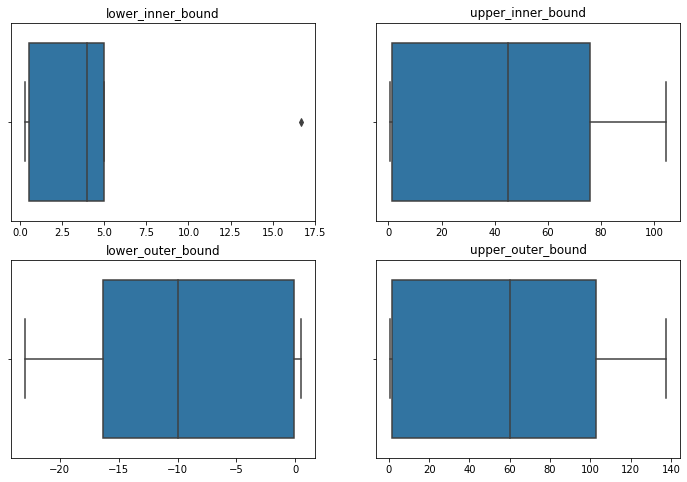

In [39]:
plt.figure(figsize=(12, 8))
plt.subplot(221)
plt.title('lower_inner_bound')
sns.boxplot(lower_inner_bound)
plt.subplot(222)
plt.title('upper_inner_bound')
sns.boxplot(upper_inner_bound)
plt.subplot(223)
plt.title('lower_outer_bound')
sns.boxplot(lower_outer_bound)
plt.subplot(224)
plt.title('upper_outer_bound')
sns.boxplot(upper_outer_bound)
plt.show


2. Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:

- Use a 2 sigma decision rule to isolate the outliers.
    - Do these make sense?
    - Should certain outliers be kept or removed?

3. Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv